In [285]:
import urbs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,7)

import seaborn as sns
sns.set_style(style="whitegrid")

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

color_dict = {
    "random": '#0070C0',
    
    #Generation
    'Biomass power plants': '#00B050',
    'Coal power plants': '#7F7F7F',
    'Gas power plants': '#ED7D31',
    'Geothermal power plants': '#385723',
    'Hydro power plants': '#1F4E79',
    'Nuclear power plants': '#BF9000',
    'Oil power plants': '#843C0C',
    'Onshore wind parks': '#9DC3E6',
    'Photovoltaics': '#F4EF11',
    'H2 power plants': '#843C0C',
    'Others': '#3B3838',
    
    # Consumption
    'Electric chargers': '#0070C0',
    'Electricity (end-use)': '#00B0F0',
    'Process heating 100+ (electric heaters)': '#C55A11',
    'Process heating 100- (heat pumps)': '#BF9000',
    'Process heating 200+ (electric heaters)': '#843C0C',
    'Space heating (heat pumps)': '#548235',
    'Curtailment': '#767171',

    # Storage
    "Elec storage out": '#FFAAA6',
    "Elec storage in": '#FF8C94',
    "Heat A storage in": '#FF8C94',
    "Heat A storage out": '#FFAAA6',
    "Heat B storage in": '#FF8C94',
    "Heat B storage out": '#FFAAA6'
}

In [286]:
# Load data for all years
scenario = "EL:LIM"

years = [2020,
         2025, 
         2030,
         2035, 
         2040, 
         2045, 
         2050
         ]

df = {}
for year in years:
    #df[year] = urbs.load(f"myopic/scenarios/yesh2_nolimit/output_bayern_{year}.h5")._result
    df[year] = urbs.load(f"myopic/scenarios/el_lim/output_bayern_{year}.h5")._result

In [287]:
# Check keys for the HDF files
df[years[0]].keys()

dict_keys(['cap_pro', 'cap_pro_new', 'cap_sto_c', 'cap_sto_c_new', 'cap_sto_p', 'cap_sto_p_new', 'com', 'com_buy', 'com_demand', 'com_env', 'com_sell', 'com_stock', 'com_supim', 'com_tuples', 'com_type', 'cost_type', 'costs', 'def_costs', 'def_initial_storage_state', 'def_intermittent_supply', 'def_partial_process_input', 'def_partial_process_output', 'def_process_input', 'def_process_output', 'def_storage_energy_power_ratio', 'def_storage_state', 'dt', 'e_co_buy', 'e_co_sell', 'e_co_stock', 'e_pro_in', 'e_pro_out', 'e_sto_con', 'e_sto_in', 'e_sto_out', 'obj', 'pro', 'pro_area_tuples', 'pro_input_tuples', 'pro_maxgrad_tuples', 'pro_output_tuples', 'pro_partial_input_tuples', 'pro_partial_output_tuples', 'pro_partial_tuples', 'pro_timevar_output_tuples', 'pro_tuples', 'res_area', 'res_buy_step', 'res_buy_total', 'res_env_step', 'res_env_total', 'res_global_co2_limit', 'res_process_capacity', 'res_process_maxgrad_lower', 'res_process_maxgrad_upper', 'res_process_throughput_by_capacity', 

In [288]:
def dual_plots():

    co2_duals = {}
    for year in years:    
        co2_duals[f"{year}_co2_dual"] = df[year]["res_global_co2_limit"]

    pd.DataFrame(co2_duals).plot.bar(legend = None)
    plt.title("Duals of the CO2 limit in €/t")

    df[year]["res_process_capacity"].reset_index().dropna().set_index('pro').drop(['stf', 'sit'], axis = 1).plot.barh(legend = None)
    plt.title(f"Duals of power plant contraints in {year} in €/MW")

    df[year]["res_storage_capacity"].reset_index().set_index('sto').drop(['stf', 'sit'], axis = 1).plot.barh(legend = None)
    plt.title(f"Duals of storage contraints in {year} in €/MWh")
#dual_plots()

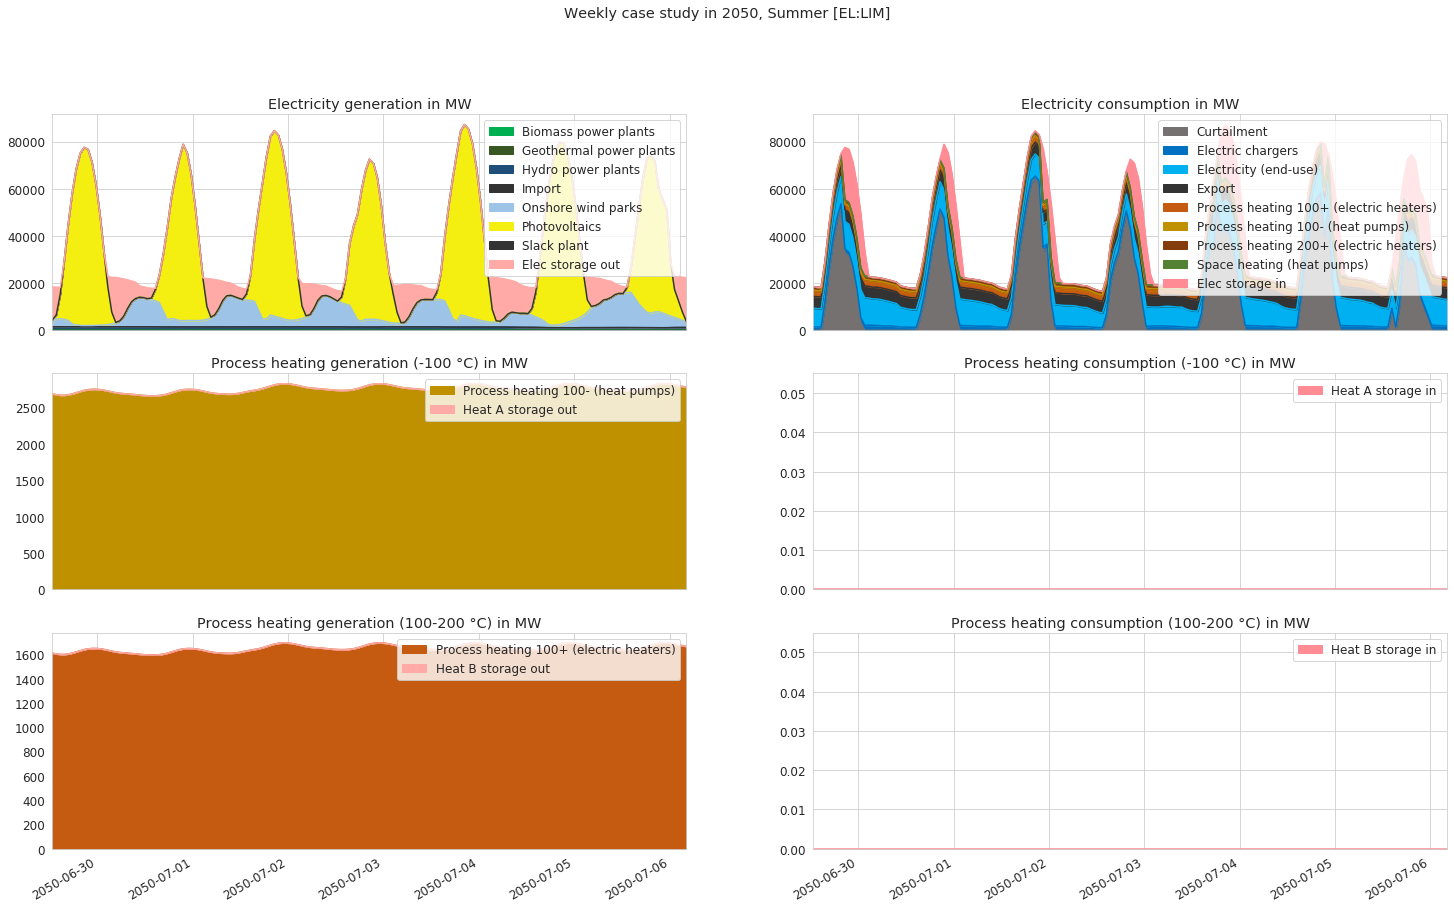

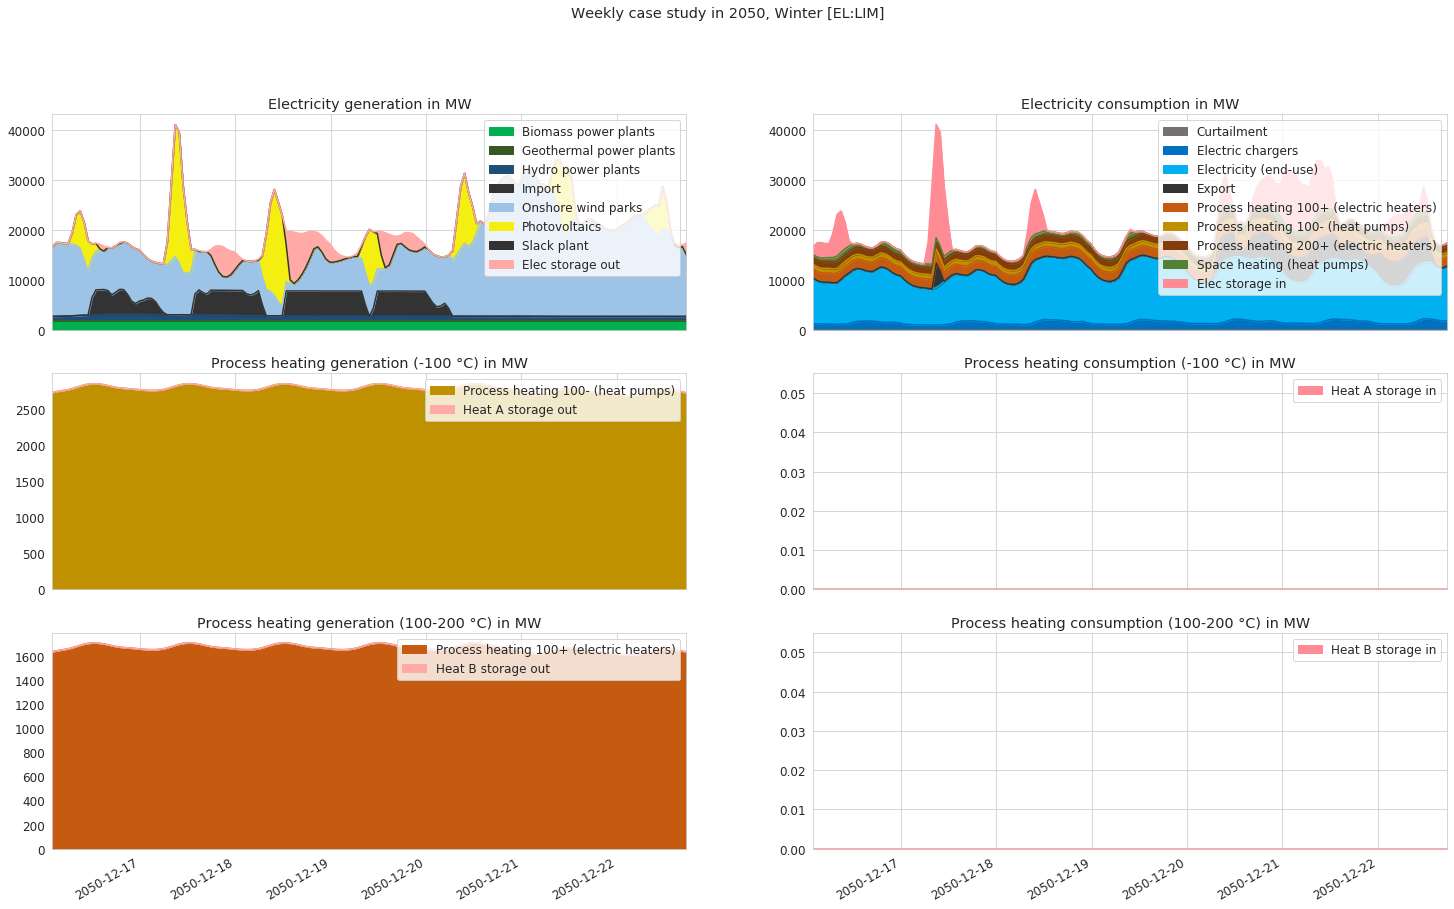

In [289]:
def dayplot(year, day, season, scenario, name):

        # Electricity storage in and output
        sto_in = (df[year]['e_sto_in']
                .unstack()['Elec']
                .unstack()
                .set_index(pd.date_range(start = f"1/1/{year}", end = f"31/12/{year}", periods = 8760))
                .sum(axis = 1)
                )
                
        sto_out = (df[year]['e_sto_out']
                .unstack()['Elec']
                .unstack()
                .set_index(pd.date_range(start = f"1/1/{year}", end = f"31/12/{year}", periods = 8760))
                .sum(axis = 1))

        sto_out.name = "Elec storage out"
        sto_in.name = "Elec storage in"

        # Heat storage A in and output
        sto_in_phA = (df[year]['e_sto_in']
                .unstack()['Process heating A']
                .unstack()
                .set_index(pd.date_range(start = f"1/1/{year}", end = f"31/12/{year}", periods = 8760))
                .sum(axis = 1))
        sto_out_phA = (df[year]['e_sto_out']
                .unstack()['Process heating A']
                .unstack()
                .set_index(pd.date_range(start = f"1/1/{year}", end = f"31/12/{year}", periods = 8760))
                .sum(axis = 1))

        sto_out_phA.name = "Heat A storage out"
        sto_in_phA.name = "Heat A storage in"


        # Heat storage B in and output
        sto_in_phB = (df[year]['e_sto_in']
                .unstack()['Process heating B']
                .unstack()
                .set_index(pd.date_range(start = f"1/1/{year}", end = f"31/12/{year}", periods = 8760))
                .sum(axis = 1))
        sto_out_phB = (df[year]['e_sto_out']
                .unstack()['Process heating B']
                .unstack()
                .set_index(pd.date_range(start = f"1/1/{year}", end = f"31/12/{year}", periods = 8760))
                .sum(axis = 1))

        sto_out_phB.name = "Heat B storage out"
        sto_in_phB.name = "Heat B storage in"

        # Electricity generation
        gen = (df[year]['e_pro_out']
                .unstack()['Elec']
                .dropna()
                .unstack()
                .replace(0, np.nan).dropna(axis = 1, how = "all")
                .replace(np.nan, 0)
                .reorder_levels(['stf', 'sit', 't'])
                .set_index(pd.date_range(start = f"1/1/{year}", end = f"31/12/{year}", periods = 8760))
                )


        # Electricity consumption
        con = (df[year]['e_pro_in']
                .unstack()['Elec']
                .dropna()
                .unstack()
                .replace(0, np.nan).dropna(axis = 1, how = "all")
                .replace(np.nan, 0)
                .reorder_levels(['stf', 'sit', 't'])
                .set_index(pd.date_range(start = f"1/1/{year}", end = f"31/12/{year}", periods = 8760))
                )


        # Process heating A consumption
        con_phA = (df[year]['e_pro_out']
        .unstack()['Process heating A']
        .dropna()
        .unstack()
        .reorder_levels(['stf', 'sit', 't'])
        .set_index(pd.date_range(start = f"1/1/{year}", end = f"31/12/{year}", periods = 8760))
        )


        # Process heating B consumption
        con_phB = (df[year]['e_pro_out']
        .unstack()['Process heating B']
        .dropna()
        .unstack()
        .reorder_levels(['stf', 'sit', 't'])
        .set_index(pd.date_range(start = f"1/1/{year}", end = f"31/12/{year}", periods = 8760))
        )


        # Create case-study plot for electricity

        fig, axes = plt.subplots(3, 2, figsize = (25, 15), sharex = True)


        gen.join(pd.DataFrame(sto_out)).iloc[0 + day*24 : 23 * 7 + day*24, :].plot(ax = axes[0,0], kind = "area", color = [color_dict.get(x, '#333333') for x in (gen.join(pd.DataFrame(sto_out))).columns])
        axes[0,0].set_title(f"Electricity generation in MW")
        axes[0,0].legend(loc = "upper right")

        con.join(pd.DataFrame(sto_in)).iloc[0 + day*24 : 23 * 7 + day*24, :].plot(ax = axes[0,1], kind = "area", color = [color_dict.get(x, '#333333') for x in (con.join(pd.DataFrame(sto_in))).columns])
        axes[0,1].set_title(f"Electricity consumption in MW")
        axes[0,1].legend(loc = "upper right")


        con_phA.join(pd.DataFrame(sto_out_phA)).iloc[0 + day*24 : 23 * 7 + day*24, :].plot(ax = axes[1,0], kind = "area", color = [color_dict.get(x, '#333333') for x in (con_phA.join(pd.DataFrame(sto_out_phA))).columns])
        axes[1,0].set_title(f"Process heating generation (-100 °C) in MW")
        axes[1,0].legend(loc = "upper right")

        (pd.DataFrame(sto_in_phA)).iloc[0 + day*24 : 23 * 7 + day*24, :].plot(ax = axes[1,1], kind = "area", color = [color_dict.get(x, '#333333') for x in (pd.DataFrame(sto_in_phA)).columns])
        axes[1,1].set_title(f"Process heating consumption (-100 °C) in MW")
        axes[1,1].legend(loc = "upper right")


        con_phB.join(pd.DataFrame(sto_out_phB)).iloc[0 + day*24 : 23 * 7 + day*24, :].plot(ax = axes[2,0], kind = "area", color = [color_dict.get(x, '#333333') for x in con_phB.join(pd.DataFrame(sto_out_phB)).columns])
        axes[2,0].set_title(f"Process heating generation (100-200 °C) in MW")
        axes[2,0].legend(loc = "upper right")

        (pd.DataFrame(sto_in_phB)).iloc[0 + day*24 : 23 * 7 + day*24, :].plot(ax = axes[2,1], kind = "area", color = [color_dict.get(x, '#333333') for x in (pd.DataFrame(sto_in_phB)).columns])
        axes[2,1].set_title(f"Process heating consumption (100-200 °C) in MW")
        axes[2,1].legend(loc = "upper right")

        plt.suptitle(f"Weekly case study in {year}, {season} [{scenario}]")
        plt.savefig(f"{name}.png", dpi = 200)

dayplot(2050, 180, "Summer", scenario, "week_sum")
dayplot(2050, 350, "Winter", scenario, "week_win")

In [290]:
def fourier_plots():

    def fourier_plot(data, comm, tech):
    
        # Convert storage level data
        df = (data['e_sto_con']
        .unstack()[comm]
        .dropna()
        .unstack()
        .set_index(pd.date_range(start = f"1/1/{year}", end = f"31/12/{year}", periods = 8761))
        )
        
        # Calculate SOC, and de-mean the timeseries data
        soc = (df[tech] - np.mean(df[tech])) / np.max(df[tech])
        n = len(soc)
        # Calculate FFT vector, power density vector, and frequency
        fhat = np.fft.fft(soc, n)
        PSD = fhat * np.conj(fhat) / n
        freq = (1/n) * np.arange(n)

        # Create a pairplot with the modified SOC and FFT components
        fig, axs = plt.subplots(2, 1)

        plt.sca(axs[0])
        plt.plot(soc)

        plt.sca(axs[1])
        plt.plot(freq[0:200], PSD[0:200])

        plt.suptitle(f"Seasonality of {tech}")

    fourier_plot(df[year], 'Process heating A', 'Process heat storage A')
    fourier_plot(df[year], 'Process heating B', 'Process heat storage B')
    fourier_plot(df[year], 'Space heating', 'Space heating storage')
    fourier_plot(df[year], 'Elec', 'Pump storage')
    fourier_plot(df[year], 'Elec', 'Battery')

#fourier_plots()

In [291]:
sto_c_y = {}
sto_p_y = {}

for year in years:
    sto_c_y[year] = df[year]['cap_sto_c'].unstack()
    sto_p_y[year] = df[year]['cap_sto_p'].unstack()

In [292]:
def storage_plot():

    sto_c_y = {}
    sto_p_y = {}

    for year in years:
        sto_c_y[year] = df[year]['cap_sto_c'].unstack()
        sto_p_y[year] = df[year]['cap_sto_p'].unstack()

    fig, axes = plt.subplots(1, 2, figsize = (20, 10), sharey=True)

    pd.concat(sto_c_y).reset_index().set_index(['sto', 'level_0']).drop(['stf', 'sit'], axis = 1).plot(ax = axes[0], kind = 'barh', stacked = True)
    axes[0].set_title("Energy storage energy capacity in MWh")

    pd.concat(sto_p_y).reset_index().set_index(['sto', 'level_0']).drop(['stf', 'sit'], axis = 1).plot(ax = axes[1], kind = 'barh', stacked = True)
    axes[1].set_title("Energy storage power capacity in MW")

    fig.suptitle("Expansion of storage capacities in the Bavarian energy system")

#storage_plot()

In [293]:
def energy_plot():

    # Creating dataframes for the list of processes

    gen = (df[years[-1]]['e_pro_out']
    .unstack()['Elec']
    .dropna()
    .unstack()
    )

    con = (df[years[-1]]['e_pro_in']
        .unstack()['Elec']
        .dropna()
        .unstack()
        )
    
    fig, axes = plt.subplots(2, 2, figsize = (20,15), sharex = True)

    gen_y = {}

    for year in years:
        gen_y[year] = (df[year]['e_pro_out']
            .unstack()['Elec']
            .dropna()
            .unstack()
            .replace(0, np.nan).dropna(axis = 1, how = "all")
            .replace(np.nan, 0)
            .reorder_levels(['stf', 'sit', 't'])
            .set_index(pd.date_range(start = f"1/1/{year}", end = f"31/12/{year}", periods = 8760))
            .resample('Y').sum()
            )
        
    to_plot = ((pd.concat(gen_y, sort = True) / 1e6)
    .reset_index()
    .set_index('level_0')
    .drop(['level_1'], axis = 1)
    )
    to_plot.plot(ax = axes[0,0], kind = 'bar', stacked = 'True', color = [color_dict.get(x, '#333333') for x in to_plot.columns])
    axes[0, 0].set_title("Generation in TWh")

    con_y = {}

    for year in years:
        con_y[year] = (df[year]['e_pro_in']
            .unstack()['Elec']
            .dropna()
            .unstack()
            .replace(0, np.nan).dropna(axis = 1, how = "all")
            .replace(np.nan, 0)
            .reorder_levels(['stf', 'sit', 't'])
            .set_index(pd.date_range(start = f"1/1/{year}", end = f"31/12/{year}", periods = 8760))
            .resample('Y').sum()
            )
        
    to_plot = ((pd.concat(con_y, sort = True) / 1e6)
    .reset_index()
    .set_index('level_0')
    .drop(['level_1'], axis = 1)
    )
    to_plot.plot(ax = axes[0,1], kind = 'bar', stacked = 'True', color = [color_dict.get(x, '#333333') for x in to_plot.columns])
    axes[0, 1].set_title("Consumption in TWh")



    gen_cap_y = {}
    con_cap_y = {}

    for year in years:
        gen_cap_y[year] = df[year]['cap_pro'].unstack()[gen.columns].drop(['Curtailment', 'Slack plant', 'Import'], axis = 1)
        con_cap_y[year] = df[year]['cap_pro'].unstack()[con.columns].drop(['Curtailment', 'Export'], axis = 1)

    to_plot = (pd.concat(gen_cap_y, sort = True)
    .reset_index()
    .drop(['stf', 'sit'], axis = 1)
    .set_index('level_0')
    )
    to_plot.plot(ax = axes[1, 0], kind = 'bar', stacked = True, color = [color_dict.get(x, '#333333') for x in to_plot.columns])
    axes[1, 0].set_title("Generation fleet in MW")


    to_plot = (pd.concat(con_cap_y, sort = True)
    .reset_index()
    .drop(['stf', 'sit'], axis = 1)
    .set_index('level_0')
    )
    to_plot.plot(ax = axes[1,1], kind = 'bar', stacked = True, color = [color_dict.get(x, '#333333') for x in to_plot.columns])
    axes[1, 1].set_title("Consumption fleet in MW")

    fig.suptitle("Expansion of consumption and generation characteristics of the Bavarian energy system")

#energy_plot()

In [294]:
# Creating dataframes for the list of processes

gen = (df[years[-1]]['e_pro_out']
.unstack()['Elec']
.dropna()
.unstack()
)

con = (df[years[-1]]['e_pro_in']
    .unstack()['Elec']
    .dropna()
    .unstack()
    )


gen_y = {}

for year in years:
    gen_y[year] = (df[year]['e_pro_out']
        .unstack()['Elec']
        .dropna()
        .unstack()
        .replace(0, np.nan).dropna(axis = 1, how = "all")
        .replace(np.nan, 0)
        .reorder_levels(['stf', 'sit', 't'])
        .set_index(pd.date_range(start = f"1/1/{year}", end = f"31/12/{year}", periods = 8760))
        .resample('Y').sum()
        )

con_y = {}

for year in years:
    con_y[year] = (df[year]['e_pro_in']
        .unstack()['Elec']
        .dropna()
        .unstack()
        .replace(0, np.nan).dropna(axis = 1, how = "all")
        .replace(np.nan, 0)
        .reorder_levels(['stf', 'sit', 't'])
        .set_index(pd.date_range(start = f"1/1/{year}", end = f"31/12/{year}", periods = 8760))
        .resample('Y').sum()
        )

gen_cap_y = {}
con_cap_y = {}

for year in years:
    gen_cap_y[year] = df[year]['cap_pro'].unstack()[gen.columns].dropna().drop(['Curtailment', 'Slack plant', 'Import'], axis = 1)
    con_cap_y[year] = df[year]['cap_pro'].unstack()[con.columns].dropna().drop(['Curtailment', 'Export'], axis = 1)

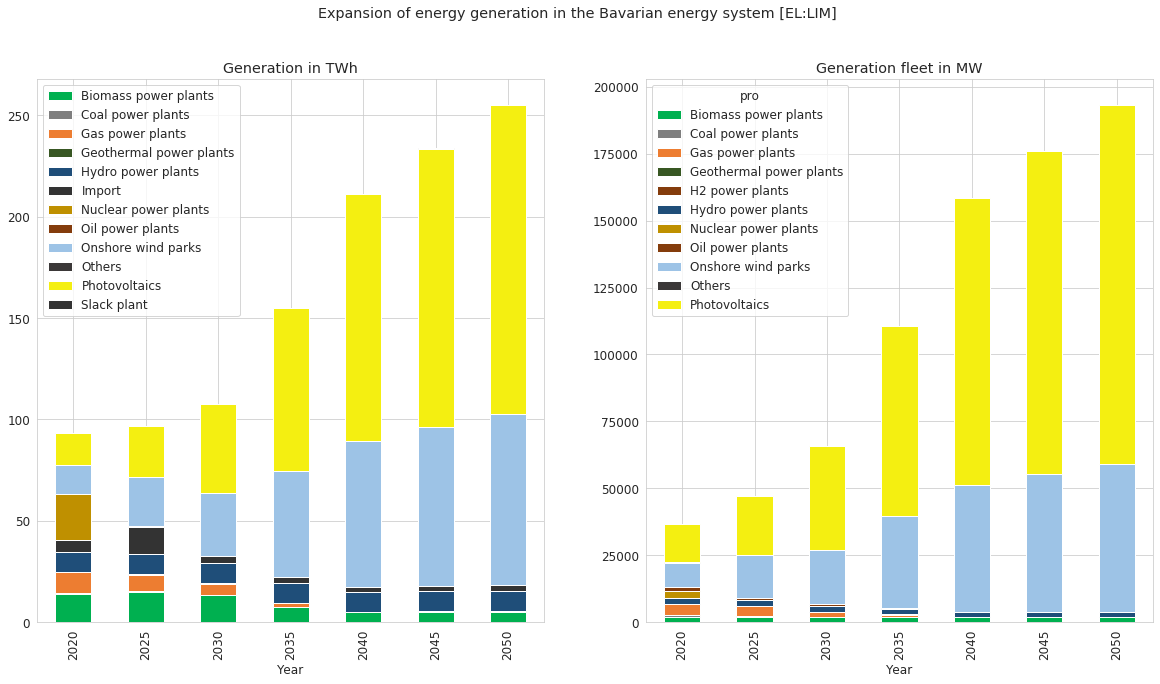

In [295]:
fig, axes = plt.subplots(1, 2, figsize = (20,10))

to_plot = ((pd.concat(gen_y, sort = True) / 1e6)
.reset_index()
.rename(columns = {"level_0":"Year"})
.set_index('Year')
.drop(['level_1'], axis = 1)
)
to_plot.plot(ax = axes[0], kind = 'bar', stacked = 'True', color = [color_dict.get(x, '#333333') for x in to_plot.columns])
axes[0].set_title("Generation in TWh")


to_plot = (pd.concat(gen_cap_y, sort = True)
.reset_index()
.rename(columns = {"level_0":"Year"})
.drop(['stf', 'sit'], axis = 1)
.set_index('Year')
)
to_plot.plot(ax = axes[1], kind = 'bar', stacked = True, color = [color_dict.get(x, '#333333') for x in to_plot.columns])
axes[1].set_title("Generation fleet in MW")

fig.suptitle(f"Expansion of energy generation in the Bavarian energy system [{scenario}]")

plt.savefig("gen.png", dpi = 200)

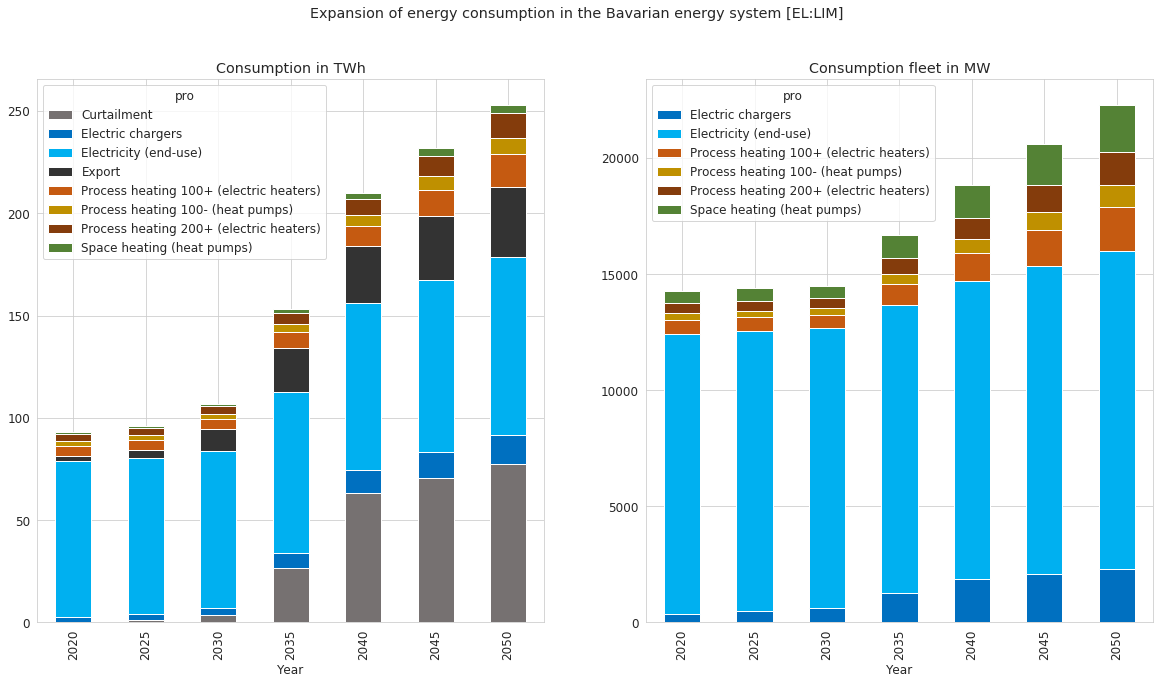

In [296]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

fig, axes = plt.subplots(1, 2, figsize = (20,10))

to_plot = ((pd.concat(con_y, sort = True) / 1e6)
.reset_index()
.rename(columns = {"level_0":"Year"})
.set_index('Year')
.drop(['level_1'], axis = 1)
)
to_plot.plot(ax = axes[0], kind = 'bar', stacked = 'True', color = [color_dict.get(x, '#333333') for x in to_plot.columns])
axes[0].set_title("Consumption in TWh")


to_plot = (pd.concat(con_cap_y, sort = True)
.reset_index()
.rename(columns = {"level_0":"Year"})
.set_index('Year')
.drop(['stf', 'sit'], axis = 1)
)
to_plot.plot(ax = axes[1], kind = 'bar', stacked = True, color = [color_dict.get(x, '#333333') for x in to_plot.columns])
axes[1].set_title("Consumption fleet in MW")

fig.suptitle(f"Expansion of energy consumption in the Bavarian energy system [{scenario}]")

plt.savefig("dem.png", dpi = 200)

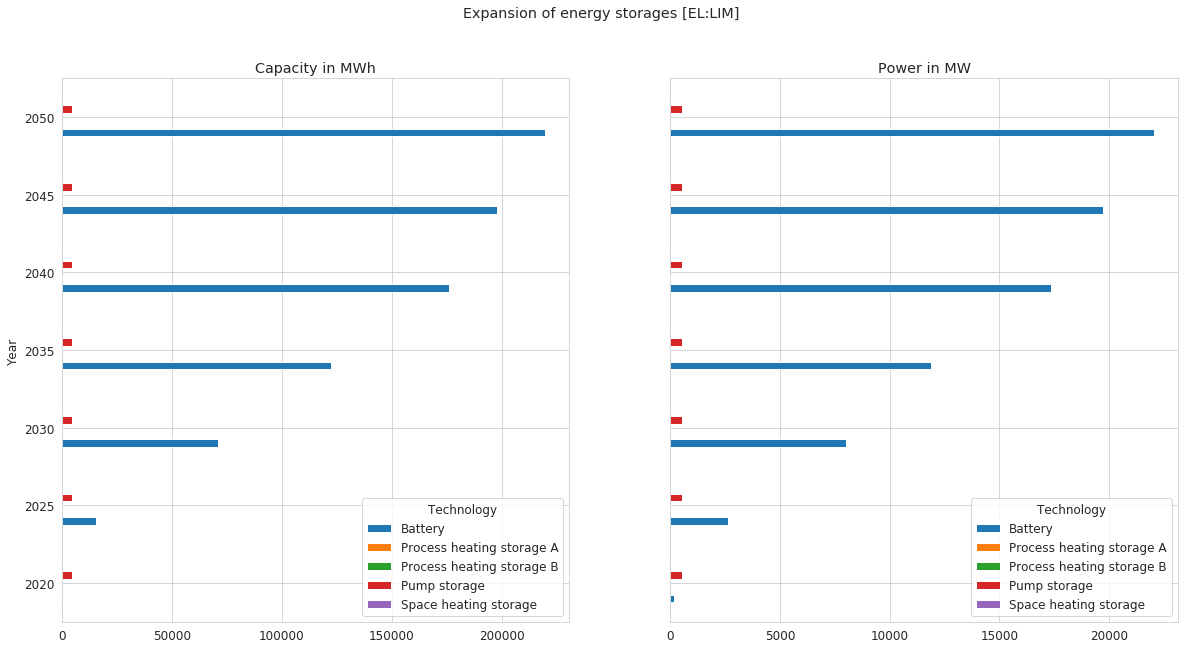

In [297]:
storages = pd.concat(sto_c_y)
storages["Capacity"] = storages.max(axis = 1)

fig, axes = plt.subplots(1, 2, figsize = (20,10), sharey=True)

(storages.reset_index()
 .rename(columns = {"level_0": "Year", "sto": "Technology"})
 .pivot(index = 'Year', columns = 'Technology', values = 'Capacity')
 .plot(kind = 'barh', ax = axes[0])
 )
axes[0].set_title("Capacity in MWh")

storages_p = pd.concat(sto_p_y)
storages_p["Power"] = storages_p.max(axis = 1)

(storages_p.reset_index()
 .rename(columns = {"level_0": "Year", "sto": "Technology"})
 .pivot(index = 'Year', columns = 'Technology', values = 'Power')
 .plot(kind = 'barh', ax = axes[1])
 )
axes[1].set_title("Power in MW")

plt.suptitle(f"Expansion of energy storages [{scenario}]")

plt.savefig("sto.png", dpi = 200)

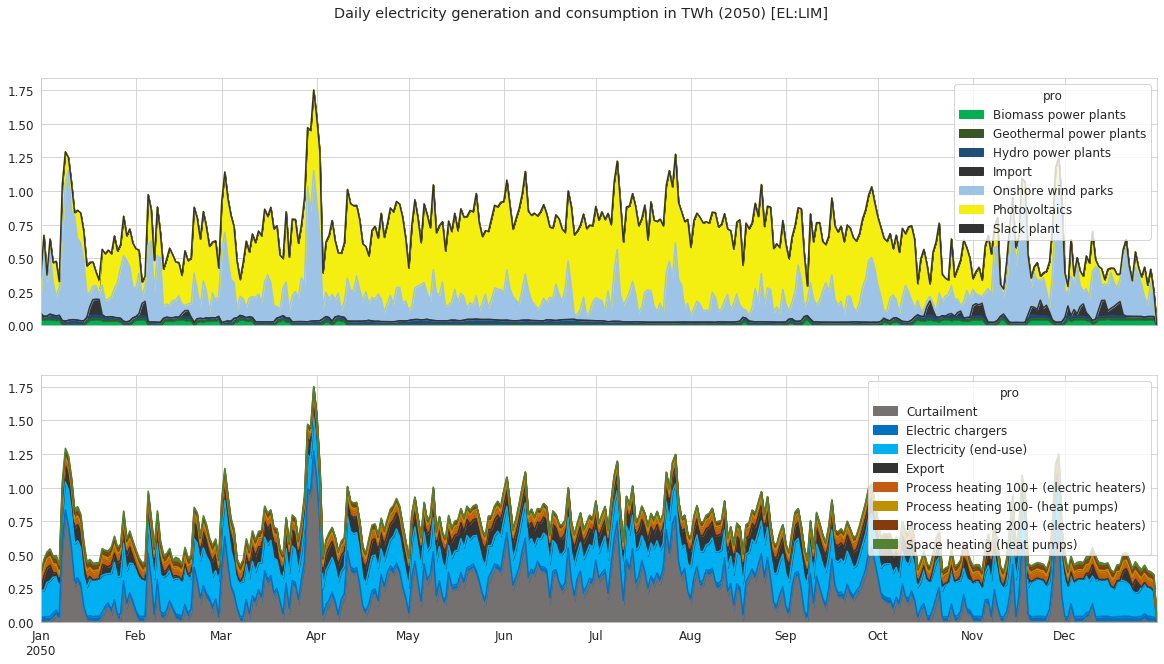

In [298]:
# Electricity generation

gens = (df[year]['e_pro_out']
 .unstack()['Elec']
 .dropna()
 .unstack()
 .replace(0, np.nan).dropna(axis = 1, how = "all")
 .replace(np.nan, 0)
 .reset_index()
 .drop(['t', 'stf', 'sit'], axis = 1)
 .set_index(pd.date_range(start = f"1/1/{year}", end = f"31/12/{year}", periods = 8760))
 )

# Electricity consumption

cons = (df[year]['e_pro_in']
 .unstack()['Elec']
 .dropna()
 .unstack()
 .replace(0, np.nan).dropna(axis = 1, how = "all")
 .replace(np.nan, 0)
 .reset_index()
 .drop(['t', 'stf', 'sit'], axis = 1)
 .set_index(pd.date_range(start = f"1/1/{year}", end = f"31/12/{year}", periods = 8760))
 )

# Creating resampled plots
fig, axs = plt.subplots(2, 1, figsize = (20, 10), sharex=True)
(gens / 1e6).resample("D").sum().plot(kind = "area", stacked = True, color = [color_dict.get(x, '#333333') for x in gens.columns], ax = axs[0])
(cons / 1e6).resample('D').sum().plot(kind = "area", stacked = True, color = [color_dict.get(x, '#333333') for x in cons.columns], ax = axs[1])
fig.suptitle(f"Daily electricity generation and consumption in TWh ({year}) [{scenario}]")

plt.savefig("ops.png", dpi = 200)

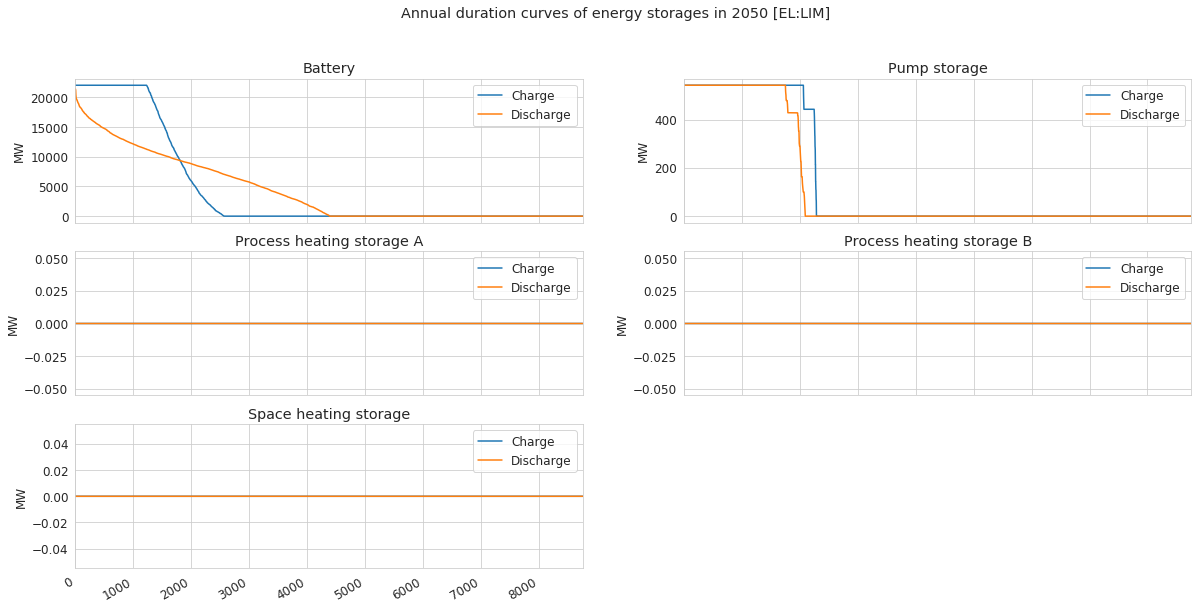

In [299]:
# Storage discharging dataframe

dfs = []
for col in df[year]['e_sto_out'].unstack().columns:
    i = (df[year]['e_sto_out']
            .unstack()[col]
            .unstack()
            .dropna(axis = 1, how = 'all')
            .reset_index()
            .set_index(pd.date_range(start = f"1/1/{year}", end = f"31/12/{year}", periods = 8760))
            .drop(['t', 'stf', 'sit'], axis = 1)
            )
    dfs.append(i)

e_sto_out = pd.concat(dfs, axis = 1)

# Storage charging dataframe

dfs = []
for col in df[year]['e_sto_in'].unstack().columns:
    i = (df[year]['e_sto_in']
            .unstack()[col]
            .unstack()
            .dropna(axis = 1, how = 'all')
            .reset_index()
            .set_index(pd.date_range(start = f"1/1/{year}", end = f"31/12/{year}", periods = 8760))
            .drop(['t', 'stf', 'sit'], axis = 1)
            )
    dfs.append(i)

e_sto_in = pd.concat(dfs, axis = 1)

# Plotting load duration curves for energy storages

fig, axs = plt.subplots(len(e_sto_in.columns)//2 + len(e_sto_in.columns)%2, 2, figsize = (20, 10), sharex = True)

for idx, tech in enumerate(e_sto_in.columns):

    e_sto_in[tech].sort_values(ascending = False).plot(use_index = False, ax = axs[idx//2, idx%2])
    e_sto_out[tech].sort_values(ascending = False).plot(use_index = False, ax = axs[idx//2, idx%2])
    axs[idx//2, idx%2].set_title(tech)
    axs[idx//2, idx%2].set_ylabel('MW')
    axs[idx//2, idx%2].legend(['Charge', 'Discharge'])

if((len(e_sto_in.columns) % 2) == 1):
    fig.delaxes(axs[len(e_sto_in.columns)//2 + len(e_sto_in.columns)%2 - 1, 1])

fig.suptitle(f'Annual duration curves of energy storages in {year} [{scenario}]')

plt.savefig("dur_sto.png", dpi = 200)

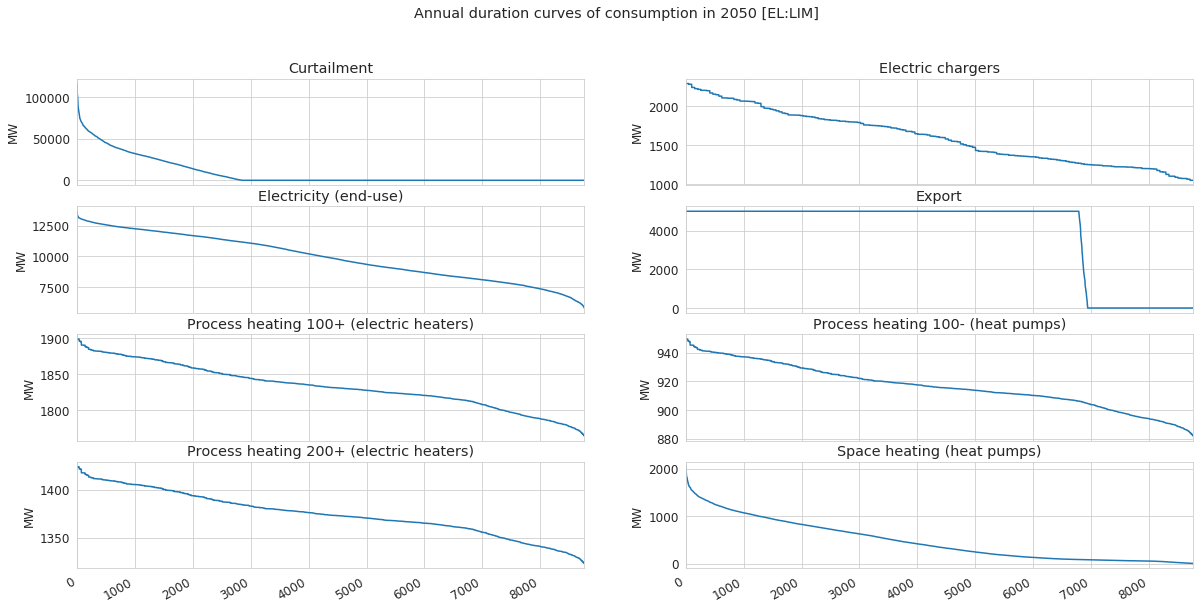

In [300]:
# Plotting load duration curves for energy consumption technologies

fig, axs = plt.subplots(len(cons.columns)//2 + len(cons.columns)%2, 2, figsize = (20, 10), sharex = True)

for idx, tech in enumerate(cons.columns):

    cons[tech].sort_values(ascending = False).plot(use_index = False, ax = axs[idx//2, idx%2])
    axs[idx//2, idx%2].set_title(tech)
    axs[idx//2, idx%2].set_ylabel('MW')

if((len(cons.columns) % 2) == 1):
    fig.delaxes(axs[len(cons.columns)//2 + len(cons.columns)%2 -1, 2 -1])

fig.suptitle(f'Annual duration curves of consumption in {year} [{scenario}]')

plt.savefig("dur_dem.png", dpi = 200)

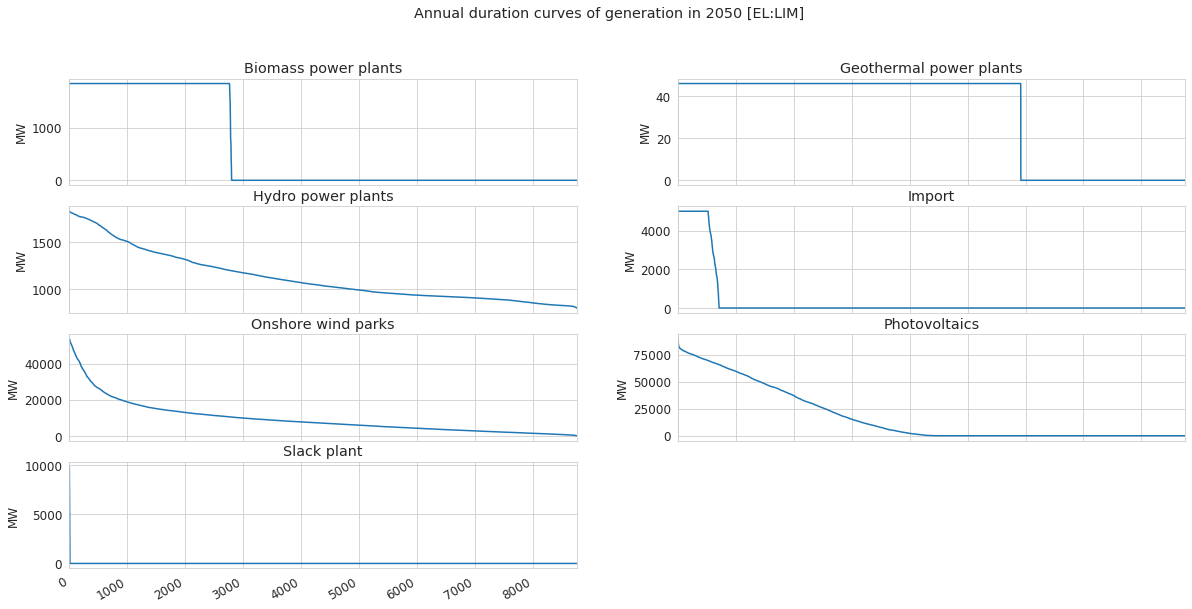

In [301]:
# Plotting load duration curves for energy generation technologies

fig, axs = plt.subplots(len(gens.columns)//2 + len(gens.columns)%2, 2, figsize = (20, 10), sharex = True)

for idx, tech in enumerate(gens.columns):

    gens[tech].sort_values(ascending = False).plot(use_index = False, ax = axs[idx//2, idx%2])
    axs[idx//2, idx%2].set_title(tech)
    axs[idx//2, idx%2].set_ylabel('MW')

if((len(gens.columns) % 2) == 1):
    fig.delaxes(axs[len(gens.columns)//2 + len(gens.columns)%2 -1, 2 -1])

fig.suptitle(f'Annual duration curves of generation in {year} [{scenario}]')

plt.savefig("dur_gen.png", dpi = 200)

In [302]:
print(((pd.concat(con_y, sort = True) / 1e6)
 .reset_index()
.rename(columns = {"level_0":"Year"})
.set_index('Year')
.drop(['level_1'], axis = 1)
 ).to_latex(index=False,
            formatters={"name": str.upper},
            float_format="{:.1f}".format
))

\begin{tabular}{rrrrrrrr}
\toprule
 Curtailment &  Electric chargers &  Electricity (end-use) &  Export &  Process heating 100+ (electric heaters) &  Process heating 100- (heat pumps) &  Process heating 200+ (electric heaters) &  Space heating (heat pumps) \\
         0.1 &                2.3 &                   76.5 &     2.1 &                                      4.9 &                                2.4 &                                      3.7 &                         1.1 \\
\midrule
         0.9 &                3.0 &                   76.5 &     3.7 &                                      4.9 &                                2.4 &                                      3.7 &                         1.1 \\
         3.5 &                3.7 &                   76.5 &    10.9 &                                      4.9 &                                2.4 &                                      3.7 &                         1.1 \\
        26.4 &                7.6 &                   78

In [303]:
print(((pd.concat(con_cap_y, sort = True))
 .reset_index()
 .rename(columns = {"level_0":"Year"})
 .set_index('Year')
 .drop(['stf', 'sit'], axis = 1)
 ).to_latex(index=False,
            formatters={"name": str.upper},
            float_format="{:.1f}".format
))

\begin{tabular}{rrrrrr}
\toprule
 Electric chargers &  Electricity (end-use) &  Process heating 100+ (electric heaters) &  Process heating 100- (heat pumps) &  Process heating 200+ (electric heaters) &  Space heating (heat pumps) \\
             371.9 &                12065.0 &                                    579.0 &                              289.5 &                                    434.3 &                       528.8 \\
\midrule
             485.5 &                12065.0 &                                    579.0 &                              289.5 &                                    434.3 &                       528.8 \\
             599.1 &                12065.0 &                                    579.0 &                              289.5 &                                    434.3 &                       528.8 \\
            1241.3 &                12424.4 &                                    901.9 &                              450.9 &                                 

In [304]:
print(((pd.concat(gen_y, sort = True) / 1e6)
 .reset_index()
 .rename(columns = {"level_0":"Year"})
 .drop(['level_1'], axis = 1)
 .set_index('Year')
 ).to_latex(index=False,
            formatters={"name": str.upper},
            float_format="{:.1f}".format
))

\begin{tabular}{rrrrrrrrrrrr}
\toprule
 Biomass power plants &  Coal power plants &  Gas power plants &  Geothermal power plants &  Hydro power plants &  Import &  Nuclear power plants &  Oil power plants &  Onshore wind parks &  Others &  Photovoltaics &  Slack plant \\
                 14.1 &                0.2 &              10.3 &                      0.4 &                 9.9 &     5.7 &                  22.8 &               0.0 &                14.0 &     0.0 &           16.0 &          nan \\
\midrule
                 15.0 &                0.2 &               8.1 &                      0.4 &                 9.9 &    13.7 &                   nan &               0.2 &                24.4 &     nan &           24.8 &          nan \\
                 13.4 &                nan &               5.7 &                      0.4 &                 9.9 &     3.2 &                   nan &               0.1 &                31.1 &     nan &           43.9 &          0.0 \\
                  7.

In [305]:
print(((pd.concat(gen_cap_y, sort = True))
 .reset_index()
 .rename(columns = {"level_0":"Year"})
 .set_index('Year')
 .drop(['stf', 'sit'], axis = 1)
 ).to_latex(index=False,
            formatters={"name": str.upper},
            float_format="{:.1f}".format
))

\begin{tabular}{rrrrrrrrrrr}
\toprule
 Biomass power plants &  Coal power plants &  Gas power plants &  Geothermal power plants &  H2 power plants &  Hydro power plants &  Nuclear power plants &  Oil power plants &  Onshore wind parks &  Others &  Photovoltaics \\
               1848.0 &              839.0 &            4219.0 &                     46.0 &              0.0 &              1981.0 &                2698.0 &            1388.0 &              9204.7 &   460.0 &        14035.0 \\
\midrule
               1848.0 &              419.5 &            3887.8 &                     46.0 &              0.0 &              1981.0 &                   0.0 &            1041.0 &             16038.2 &     0.0 &        21814.9 \\
               1848.0 &                0.0 &            2109.5 &                     46.0 &              0.0 &              1981.0 &                   0.0 &             694.0 &             20419.9 &     0.0 &        38596.8 \\
               1848.0 &                0.0 & 

In [306]:
(storages.reset_index()
 .rename(columns = {"level_0": "Year", "sto": "Technology"})
 .pivot(index = 'Year', columns = 'Technology', values = 'Capacity')
)

Technology,Battery,Process heating storage A,Process heating storage B,Pump storage,Space heating storage
Year,,,,,
2020,714.514981,0.0,0.0,4500.0,0.0
2025,15755.333852,0.0,0.0,4500.0,0.0
2030,70947.237123,0.0,0.0,4500.0,0.0
2035,122433.228743,0.0,0.0,4500.0,0.0
2040,175654.278218,0.0,0.0,4500.0,0.0
2045,197608.817018,0.0,0.0,4500.0,0.0
2050,219387.216971,0.0,0.0,4500.0,0.0
